# Competition Link

https://www.kaggle.com/competitions/playground-series-s4e6/overview

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2024-06-14 17:17:04.005182: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 17:17:04.013943: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 17:17:04.134465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 17:17:05.843291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load Dataset


In [3]:
data = pd.read_csv('./playground-series-s4e6/train.csv').drop('id', axis=1)

In [4]:
test = pd.read_csv('./playground-series-s4e6/test.csv')
ids = test['id']
test = test.drop('id', axis=1)

In [5]:
data.isnull().sum() # => we don't have missing data

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
data.dtypes # => check features type to check encoding needs

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [7]:
# encode target using LabelEncoder
y_train = data['Target']
data = data.drop('Target', axis=1)
y_train = LabelEncoder().fit_transform(y_train)

   count
0       
2  36282
0  25296
1  14940


<Axes: >

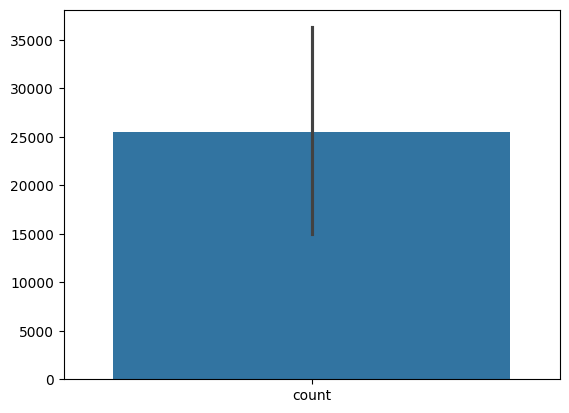

In [19]:
xx = pd.DataFrame(pd.DataFrame(y_train).value_counts())
print(xx)
sns.barplot(data=xx)

In [13]:
# plt.figure(figsize=(100, 100))
# sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, linewidths=0.5)

# Normalizing

In [27]:
x_train, x_test = StandardScaler().fit_transform(data), StandardScaler().fit_transform(test)

In [28]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Model

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(36,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L1),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [30]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,059 (332.26 KB)

 Trainable params: 85,059 (332.26 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=2048)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5020 - loss: 42.9263
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7372 - loss: 21.0920
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7498 - loss: 7.4689
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7507 - loss: 1.8713
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7645 - loss: 0.9053
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7800 - loss: 0.7499
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7983 - loss: 0.7135
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8084 - loss: 0.6955
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8091 - loss: 0.6851
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8119 - loss: 0.6706
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8128 - loss: 0.6624
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accurac

In [33]:
# df = pd.DataFrame(hist.history)
# plt.plot(df['accuracy'], label='train acc')
# plt.plot(df['val_accuracy'], label='val acc')
# plt.title('train acc VS val acc')
# plt.legend()
# plt.plot(df['loss'], label='train loss')
# plt.plot(df['val_loss'], label='val loss')
# plt.title('train loss VS val loss')
# plt.legend()

In [34]:
pre = model.predict(x_test)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step


# Creat Output

In [35]:
op = {'id':list(ids), 'Target':[]}
classes = {0:'Dropout', 1:'Enrolled', 2:'Graduate'}
counter = 0
for _ in op['id']:
    op['Target'].append(classes[np.argmax(pre[counter])])
    counter += 1

In [36]:
df = pd.DataFrame(op)
df.to_csv('output.csv', index=False)